<a href="https://colab.research.google.com/github/satriayyp/PCVK_Ganjil_2023/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tngkat kecerahan citra
-------------------------------
Masukan nilai kecerahan :50


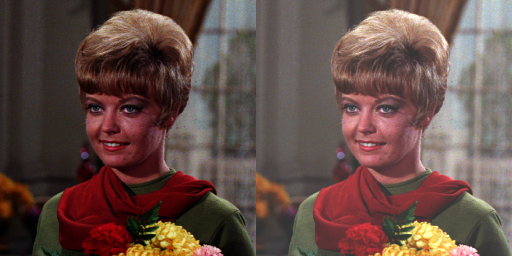

In [10]:
print('Mengubah tngkat kecerahan citra')
print('-------------------------------')
try:
  brightness = int (input('Masukan nilai kecerahan :'))
except ValueError:
  print('Error,not a number')

original =cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness,0,255)

final_frame=cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

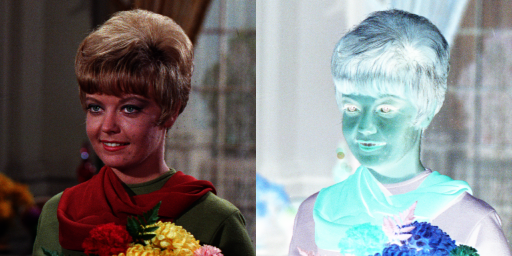

In [40]:
#TUGAS PRAKTIKUMM

#NO 1


# Membaca citra asli

original =cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = 255 - original[y,x,c]

final_frame=cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


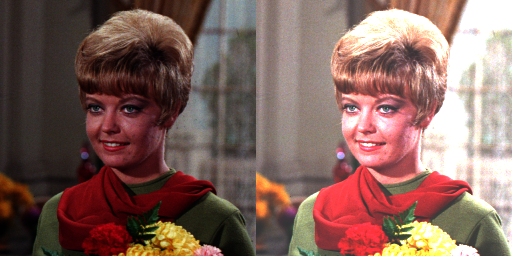

In [41]:
#no 2
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


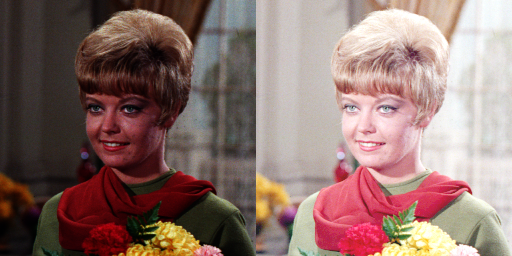

In [35]:
#no 3
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

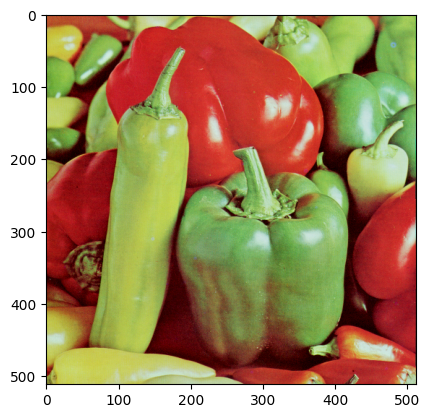

In [45]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/peppers.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

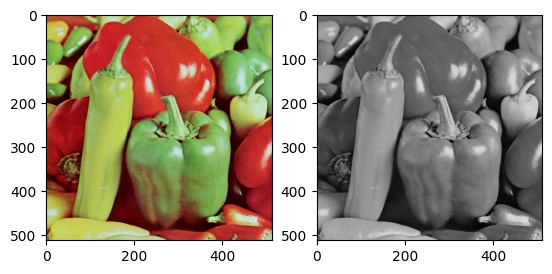

In [46]:
#no 4
#averaging
# a. Averaging

img_avg = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/peppers.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

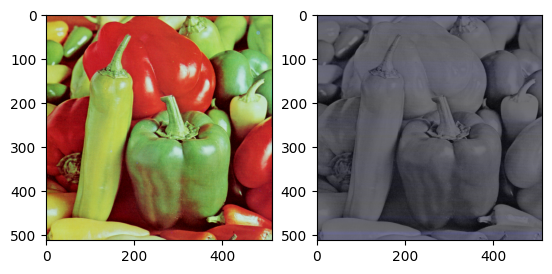

In [47]:
#lightness
img_light = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/peppers.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

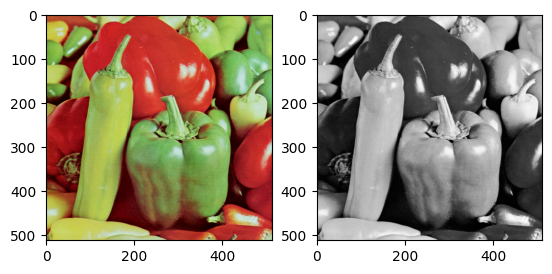

In [59]:
#luminance

img_lum = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/peppers.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

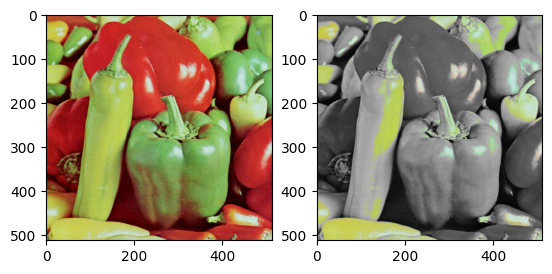

In [54]:
#no 5
ret, mask = cv.threshold(img [:,:,2], 180, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

yellow = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img, 255 - mask3)
out = gray + yellow
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')